In [87]:
## Import

import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

[[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]]


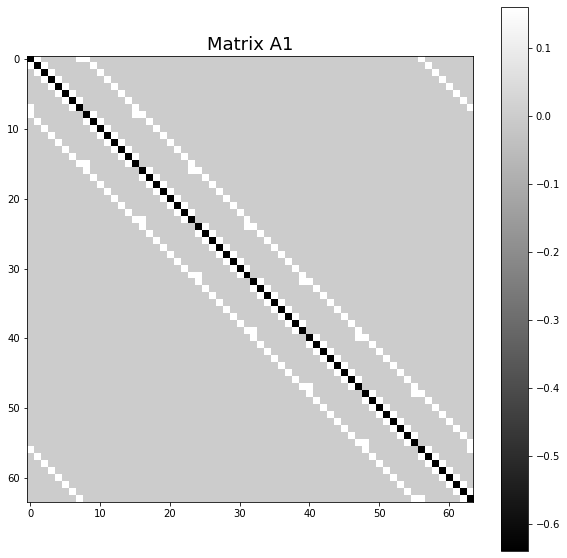

In [88]:
## Part a)
# Get matrix A
n = 8 
N = n * n
L = 10
x = np.linspace(-L, L, n+1)  
y = np.linspace(-L, L, n+1)  
delta_x = x[1] - x[0]
delta_y = y[1] - y[0]
x[:-1]; y[:-1]


main_dia = np.ones(N) 
left_dia = np.ones(N) 
n_1_dia = np.zeros(N) 


for j in range(1, n+1):
    left_dia[n*j-1] = 0 
    n_1_dia[n*j-1] = 1 


right_dia = np.zeros_like(left_dia) 
right_dia[1:N] = left_dia[0:N-1]
right_dia[0] = left_dia[N-1]


minus_n_1_dia = np.zeros_like(n_1_dia)
minus_n_1_dia[1:N] = n_1_dia[0:N-1]
minus_n_1_dia[0] = n_1_dia[N-1]

    
diagonals = [main_dia, main_dia, minus_n_1_dia, 
             left_dia, -4 * main_dia, right_dia, 
             n_1_dia, main_dia, main_dia]

offsets = [-(N-n), -n, -n+1, -1, 0, 1, n-1, n, (N-n)]
    
A = spdiags(diagonals, offsets, N, N).toarray()

A = A / (delta_x * delta_x)
print(A)

plt.figure(figsize=(10, 10))
plt.title("Matrix A1", fontsize=18)
plt.imshow(A, cmap='gray', interpolation='none')
plt.colorbar()

A1 = A



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


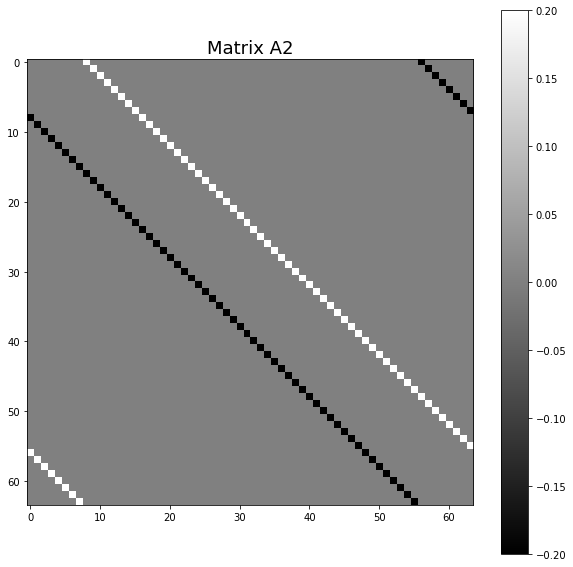

In [89]:
# Get matrix B
main_dia_b = np.ones(N)
left_dia_b = -1 * np.ones(N)
right_dia_b = np.ones(N)
diagonals_b = [main_dia_b, left_dia_b, right_dia_b, -1*main_dia_b]
offsets_b = [-(N-n), -n, n, (N-n)]

B = spdiags(diagonals_b, offsets_b, N, N).toarray()

B = B / (2 * delta_x)
print(B)

plt.figure(figsize=(10, 10))
plt.title("Matrix A2", fontsize=18)
plt.imshow(B, cmap='gray', interpolation='none')
plt.colorbar()

A2 = B




[[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]


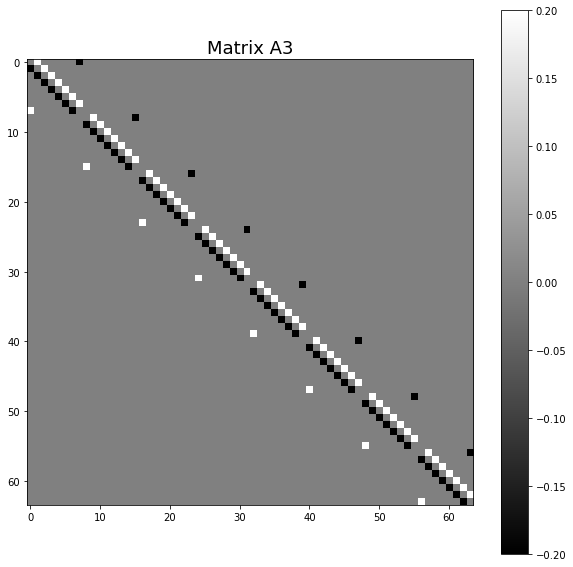

In [90]:

# Get matrix C

right_dia_c = np.ones(N)
left_dia_c = np.ones(N)
n_1_dia_c = np.zeros(N) 

for j in range(1, n+1):
    left_dia_c[n*j-1] = 0 # overwrite every m^th value with zero 
    n_1_dia_c[n*j-1] = 1 # overwirte every m^th value with one


minus_n_1_dia_c = np.zeros_like(n_1_dia_c)
minus_n_1_dia_c[1:N] = n_1_dia_c[0:N-1]
minus_n_1_dia_c[0] = n_1_dia_c[N-1]

right_dia_c = np.zeros_like(left_dia_c) 
right_dia_c[1:N] = left_dia_c[0:N-1]
right_dia_c[0] = left_dia_c[N-1]

diagonals_c = [minus_n_1_dia_c, -1 * left_dia_c, right_dia_c, -1 * n_1_dia_c]
offsets_c = [-n+1, -1, 1, n-1]


C = spdiags(diagonals_c, offsets_c, N, N).toarray()

C = C / (2 * delta_y)
print(C)

plt.figure(figsize=(10, 10))
plt.title("Matrix A3", fontsize=18)
plt.imshow(C, cmap='gray', interpolation='none')
plt.colorbar()

A3 = C